In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
all_files=[]
import os
for root, dirs, files in os.walk("./"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [3]:
dfs=[]
for path in all_files:
    df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
    dfs.append(df)
print('Features:')
for col in dfs[2].columns:
    print('\t',col)

Features:
	 Accelerometer1RMS
	 Accelerometer2RMS
	 Current
	 Pressure
	 Temperature
	 Thermocouple
	 Voltage
	 Volume Flow RateRMS
	 anomaly
	 changepoint


If we need to load a specific type of experiments:

In [4]:
i,sum_an,sum_cp = 0,0,0
for df in dfs[1:]:
    sum_an += df.anomaly.sum()
    sum_cp += df.changepoint.sum()
    i +=1

In [5]:
i,sum_an,sum_cp

(34, 13067.0, 129.0)

In [ ]:
dfs=[]
for path in all_files:
    if 'valve2' in path:
        df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
        dfs.append(df)
        print(len(df),df.index[-1]-df.index[0])
        plt.plot(df['Volume Flow RateRMS'][500:].rolling(5).mean().values,label=path)
plt.legend()

1125 0 days 00:19:59
1063 0 days 00:20:00
1129 0 days 00:19:59
995 0 days 00:17:38


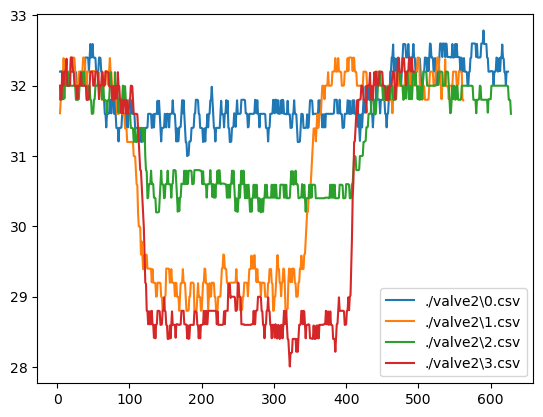

In [8]:
dfs=[]
for path in all_files:
    if 'valve2' in path:
        df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
        dfs.append(df)
        print(len(df),df.index[-1]-df.index[0])
        plt.plot(df['Volume Flow RateRMS'][500:].rolling(5).mean().values,label=path)
plt.legend()

**dfs** is the list of pandas.dataframes with experiments

# Statistical properties

In [6]:
from IPython.display import display

In [7]:
for i in range(len(dfs)):
    print(all_files[i].replace("/","\\"))
    display(dfs[i].describe())


.\anomaly-free\anomaly-free.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
count,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000
mean,0.212604,0.268407,2.403010,0.111266,89.472308,28.474310,228.647173,125.237471
std,0.004740,0.003989,0.486469,0.253332,0.667109,0.730734,10.980578,1.605327
min,0.188217,0.248062,0.855284,-1.257000,88.171300,26.850800,201.365000,118.000000
25%,0.210723,0.265510,2.129560,0.054711,88.954100,27.916700,222.623000,124.000000
50%,0.213092,0.267368,2.541890,0.054711,89.351500,28.640400,228.932000,125.677000
75%,0.215540,0.271630,2.728770,0.382638,89.861700,29.113700,234.926000,126.328000
max,0.227198,0.279921,3.241530,1.366420,91.724900,29.522100,252.806000,128.353000


.\other\1.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,0.080549,0.131089,1.569378,0.054711,92.567708,22.237863,230.246807,76.157459,0.252349,0.002685
std,0.001167,0.003030,0.386894,0.270437,1.933215,0.018487,11.037523,1.155151,0.434652,0.051778
min,0.078419,0.124244,0.589101,-0.929070,88.811900,22.193700,203.973000,73.020200,0.000000,0.000000
25%,0.079681,0.129025,1.304460,0.054711,90.391600,22.224900,223.982000,76.000000,0.000000,0.000000
50%,0.080332,0.130965,1.640290,0.054711,93.277600,22.237900,230.935000,76.980100,0.000000,0.000000
75%,0.081370,0.133099,1.859660,0.054711,94.198700,22.251800,237.096000,77.000000,1.000000,0.000000
max,0.083569,0.139038,2.328130,0.710565,95.011400,22.281900,254.511000,77.980600,1.000000,1.000000


.\other\10.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,0.234003,0.281715,2.466010,0.096968,85.942679,30.465228,226.876424,128.124729,0.441598,0.003014
std,0.005879,0.004852,0.463701,0.257084,0.418037,1.265822,10.828766,1.886648,0.496765,0.054841
min,0.217418,0.270812,0.914024,-0.929070,84.918100,28.819100,201.113000,125.314000,0.000000,0.000000
25%,0.229362,0.278373,2.194215,0.054711,85.653000,29.187000,220.706500,126.687000,0.000000,0.000000
50%,0.233938,0.281029,2.583900,0.054711,85.927100,31.340600,227.210000,127.687000,0.000000,0.000000
75%,0.237735,0.284461,2.778145,0.382638,86.226350,31.678450,233.063000,129.688000,1.000000,0.000000
max,0.250215,0.298528,3.296250,1.038490,87.012500,32.077300,250.821000,133.688000,1.000000,1.000000


.\other\11.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.238581,0.291871,2.420021,0.096597,85.001409,30.497348,227.714683,128.005554,0.378992,0.003361
std,0.004856,0.007342,0.479372,0.263653,0.330782,0.482363,10.837940,1.109751,0.485340,0.057904
min,0.226751,0.277272,0.920546,-1.257000,84.311700,29.840600,200.925000,123.312000,0.000000,0.000000
25%,0.235563,0.285839,2.147158,0.054711,84.732325,30.041600,222.206250,127.626250,0.000000,0.000000
50%,0.238185,0.290374,2.542645,0.054711,85.017600,30.398100,228.040500,128.000000,0.000000,0.000000
75%,0.240840,0.298467,2.752920,0.382638,85.231925,30.869825,233.911750,128.690000,1.000000,0.000000
max,0.257534,0.309150,3.283270,0.710565,85.965800,31.433600,251.511000,130.690000,1.000000,1.000000


.\other\12.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,0.248074,0.292677,2.430626,0.101647,85.167554,29.381990,228.390509,103.516880,0.294847,0.003817
std,0.007437,0.005836,0.512522,0.247110,0.394140,0.182259,11.012382,42.787028,0.456192,0.061692
min,0.235567,0.278392,0.846923,-0.601143,84.242000,28.964400,200.968000,0.556171,0.000000,0.000000
25%,0.242698,0.288415,2.154920,0.054711,84.909750,29.265200,222.343250,120.692000,0.000000,0.000000
50%,0.246011,0.292146,2.572010,0.054711,85.155950,29.423850,228.295500,125.000000,0.000000,0.000000
75%,0.251329,0.296381,2.758138,0.382638,85.448425,29.493675,234.543250,126.311000,1.000000,0.000000
max,0.270455,0.313837,3.233250,1.366420,86.171500,29.693700,251.492000,128.383000,1.000000,1.000000


.\other\13.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.248198,0.290778,2.391026,0.090950,85.645343,29.021277,227.720978,102.638098,0.287107,0.004334
std,0.007220,0.006351,0.530793,0.254362,0.298787,0.153649,11.318080,42.463127,0.452657,0.065724
min,0.236260,0.278392,0.893957,-0.601143,84.981600,28.812600,201.719000,0.555512,0.000000,0.000000
25%,0.243341,0.285931,2.093110,0.054711,85.416300,28.882600,221.616500,120.000000,0.000000,0.000000
50%,0.245653,0.290010,2.552210,0.054711,85.639600,28.981000,227.897000,124.385000,0.000000,0.000000
75%,0.250817,0.294511,2.750145,0.382638,85.877500,29.119600,234.338500,125.620000,1.000000,0.000000
max,0.270455,0.312702,3.284600,1.366420,86.446600,29.401000,251.344000,127.692000,1.000000,1.000000


.\other\14.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,0.246777,0.290569,2.403226,0.114136,86.210392,30.274132,227.470112,127.115355,0.333702,0.003315
std,0.015643,0.018216,0.512797,0.256314,0.298183,2.117894,10.522741,6.174822,0.471795,0.057512
min,0.015752,0.015505,0.149842,-0.601143,85.561000,28.688600,201.967000,2.767650,0.000000,0.000000
25%,0.245975,0.287200,2.096290,0.054711,85.964800,28.739100,221.748000,126.000000,0.000000,0.000000
50%,0.248005,0.291744,2.555740,0.054711,86.173100,28.765500,227.768000,126.694000,0.000000,0.000000
75%,0.250218,0.295926,2.758550,0.382638,86.468700,33.266600,233.614000,129.307000,1.000000,0.000000
max,0.256944,0.306503,3.318370,0.710565,86.962800,33.415100,251.540000,131.390000,1.000000,1.000000


.\other\2.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.080406,0.131700,1.577082,0.008465,87.893008,22.103674,230.498165,75.369309,0.492308,0.005128
std,0.000983,0.002480,0.394473,0.261268,0.646273,0.018789,10.752794,1.402817,0.500262,0.071473
min,0.075663,0.125451,0.589853,-1.257000,86.553400,22.067000,204.303000,73.000000,0.000000,0.000000
25%,0.080063,0.129755,1.239123,-0.273216,87.334150,22.087400,224.416500,74.000000,0.000000,0.000000
50%,0.080467,0.131546,1.676740,0.054711,87.968850,22.104400,230.854000,75.981300,0.000000,0.000000
75%,0.080976,0.133564,1.887000,0.054711,88.407450,22.119250,236.659250,76.980600,1.000000,0.000000
max,0.082504,0.138089,2.348740,0.710565,89.151000,22.151000,254.128000,78.000000,1.000000,1.000000


.\other\3.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,0.081098,0.132212,1.573211,0.011449,86.980258,22.112552,230.035659,76.047435,0.350044,0.003518
std,0.000639,0.002566,0.385167,0.256350,0.857701,0.016770,11.052438,1.041825,0.477193,0.059235
min,0.079158,0.125210,0.598223,-0.601143,85.280200,22.078000,203.887000,74.000000,0.000000,0.000000
25%,0.080630,0.130171,1.296880,-0.273216,86.364100,22.099900,223.636000,75.000000,0.000000,0.000000
50%,0.081074,0.132053,1.654900,0.054711,86.824800,22.110100,230.496000,76.020100,0.000000,0.000000
75%,0.081548,0.134189,1.869030,0.054711,87.596400,22.126100,236.537000,77.000000,1.000000,0.000000
max,0.083113,0.138839,2.328460,0.710565,88.993500,22.155600,254.611000,78.000000,1.000000,1.000000


.\other\4.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.081498,0.133157,1.569127,0.011483,86.751502,22.095212,229.916947,75.084942,0.331654,0.002519
std,0.000623,0.002720,0.378254,0.265543,0.676721,0.021551,10.962711,2.247426,0.471005,0.050146
min,0.079886,0.126692,0.601484,-0.601143,85.280200,22.020900,203.884000,70.021400,0.000000,0.000000
25%,0.081035,0.131049,1.284185,-0.273216,86.198550,22.083900,223.645500,72.978700,0.000000,0.000000
50%,0.081498,0.133010,1.636030,0.054711,86.777500,22.096300,230.396000,76.000000,0.000000,0.000000
75%,0.081947,0.135216,1.865470,0.054711,87.327750,22.108100,236.421000,77.000000,1.000000,0.000000
max,0.083262,0.141581,2.347860,0.710565,88.133000,22.153000,254.330000,78.000000,1.000000,1.000000


.\other\5.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,0.364185,0.434239,2.442466,0.115186,88.694695,29.389339,228.615721,126.240843,0.354978,0.001732
std,0.199204,0.223727,0.470344,0.269898,0.291325,0.057439,10.958843,0.581523,0.478714,0.041594
min,0.188217,0.249319,0.889359,-0.601143,87.939300,29.325500,202.402000,124.323000,0.000000,0.000000
25%,0.215328,0.268301,2.200970,0.054711,88.458700,29.351500,222.853500,126.000000,0.000000,0.000000
50%,0.219425,0.272439,2.580270,0.054711,88.684300,29.367200,228.803000,126.000000,0.000000,0.000000
75%,0.626333,0.720399,2.756410,0.382638,88.934700,29.399800,234.872000,126.679000,1.000000,0.000000
max,0.722747,0.800498,3.260330,1.038490,89.381000,29.601400,252.473000,128.680000,1.000000,1.000000


.\other\6.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.337098,0.387925,2.434945,0.109604,88.641982,29.601185,228.726139,126.787457,0.350480,0.003487
std,0.184967,0.189711,0.462894,0.250339,0.318270,0.054655,10.388485,0.683101,0.477328,0.058977
min,0.188173,0.229814,0.887818,-0.929070,87.889800,29.470000,202.335000,124.644000,0.000000,0.000000
25%,0.210716,0.261064,2.161680,0.054711,88.414800,29.567150,223.532000,126.321000,0.000000,0.000000
50%,0.213510,0.263774,2.559990,0.054711,88.624100,29.599600,229.039000,127.000000,0.000000,0.000000
75%,0.593273,0.647396,2.744960,0.382638,88.902650,29.629050,234.030500,127.321000,1.000000,0.000000
max,0.658716,0.735456,3.207430,1.038490,89.384400,29.777100,252.171000,128.681000,1.000000,1.000000


.\other\7.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,0.319993,0.371743,2.393621,0.117890,88.457737,29.796923,227.960487,127.022205,0.318349,0.003670
std,0.165378,0.176490,0.486438,0.260563,0.330934,0.067933,10.861083,0.855867,0.466049,0.060495
min,0.195017,0.239526,0.901802,-0.601143,87.665600,29.672400,201.555000,124.000000,0.000000,0.000000
25%,0.213958,0.259863,2.132767,0.054711,88.227350,29.754625,221.531750,126.367000,0.000000,0.000000
50%,0.218351,0.263074,2.513530,0.054711,88.423000,29.787600,228.454000,127.000000,0.000000,0.000000
75%,0.410124,0.464194,2.719405,0.382638,88.725350,29.831300,234.494000,127.682000,1.000000,0.000000
max,0.649273,0.732399,3.223400,1.038490,89.279300,30.024200,252.045000,129.365000,1.000000,1.000000


.\other\8.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.221979,0.266264,2.402285,0.129617,88.322749,29.881344,228.316720,127.600522,0.351351,0.003487
std,0.019188,0.019990,0.495550,0.258143,0.290694,0.070942,11.125485,0.612175,0.477601,0.058977
min,0.208880,0.253698,0.897348,-0.601143,87.708800,29.756700,201.423000,125.317000,0.000000,0.000000
25%,0.216359,0.262593,2.114050,0.054711,88.067300,29.829050,222.364000,127.317000,0.000000,0.000000
50%,0.219212,0.264696,2.557730,0.054711,88.322100,29.853300,228.440000,127.684000,0.000000,0.000000
75%,0.223125,0.266975,2.739610,0.382638,88.574900,29.924450,234.497500,128.000000,1.000000,0.000000
max,0.607649,0.700065,3.233400,1.038490,89.009800,30.110200,252.023000,129.684000,1.000000,1.000000


.\other\9.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,0.355076,0.406051,2.427980,0.109174,87.125198,29.557822,227.478664,126.898960,0.350524,0.003497
std,0.181743,0.195370,0.497583,0.246996,0.612079,0.203767,11.296446,1.280323,0.477343,0.059054
min,0.209199,0.250680,0.884918,-0.601143,85.928300,29.231400,200.744000,123.316000,0.000000,0.000000
25%,0.228961,0.271143,2.134647,0.054711,86.639075,29.379750,220.940250,126.000000,0.000000,0.000000
50%,0.233670,0.276229,2.565860,0.054711,87.063000,29.567900,227.722000,127.316000,0.000000,0.000000
75%,0.627172,0.694139,2.764038,0.382638,87.612000,29.722300,234.345250,128.000000,1.000000,0.000000
max,0.657403,0.750723,3.259970,0.710565,88.624300,29.993500,251.612000,129.000000,1.000000,1.000000


.\valve1\0.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.026521,0.040174,1.004630,0.084159,77.436352,25.958171,230.927635,32.022679,0.349608,0.003487
std,0.000329,0.000774,0.268688,0.249567,1.745585,0.078456,10.748393,0.457728,0.477054,0.058977
min,0.025553,0.038072,0.388229,-0.601143,74.237000,25.829900,203.967000,31.000000,0.000000,0.000000
25%,0.026293,0.039631,0.794215,0.054711,75.663000,25.878800,225.340500,32.000000,0.000000,0.000000
50%,0.026520,0.040172,1.035130,0.054711,78.383300,25.954800,231.339000,32.000000,0.000000,0.000000
75%,0.026743,0.040697,1.221525,0.382638,78.917750,26.020300,237.099500,32.000000,1.000000,0.000000
max,0.027489,0.043046,1.662610,0.710565,79.889100,26.104400,255.324000,32.998600,1.000000,1.000000


.\valve1\1.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,0.026868,0.040045,0.979026,0.074473,73.713523,25.740027,231.413459,31.566819,0.351092,0.003493
std,0.000313,0.000988,0.277454,0.249990,1.333144,0.063399,10.764134,0.760021,0.477520,0.059028
min,0.025834,0.037609,0.375488,-0.929070,71.000400,25.611100,203.738000,30.000000,0.000000,0.000000
25%,0.026648,0.039406,0.735739,0.054711,72.789200,25.690000,225.768000,31.000000,0.000000,0.000000
50%,0.026869,0.039965,0.997159,0.054711,73.908600,25.745900,231.293000,32.000000,0.000000,0.000000
75%,0.027078,0.040583,1.206580,0.054711,74.270600,25.781900,237.540000,32.000000,1.000000,0.000000
max,0.027946,0.053439,1.596190,1.038490,76.280100,25.924000,254.520000,33.000000,1.000000,1.000000


.\valve1\10.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.027755,0.041471,0.970104,0.063295,68.517408,24.751428,230.386684,31.523800,0.349913,0.003490
std,0.000481,0.001685,0.277052,0.264199,0.892976,0.016573,11.421049,1.157294,0.477150,0.059002
min,0.026094,0.038207,0.399169,-0.601143,66.236000,24.718100,203.518000,29.000000,0.000000,0.000000
25%,0.027391,0.040347,0.731540,0.054711,67.866225,24.740800,223.675250,30.000000,0.000000,0.000000
50%,0.027762,0.041251,0.985958,0.054711,68.570450,24.749800,230.646000,32.000000,0.000000,0.000000
75%,0.028126,0.042215,1.193158,0.054711,69.239675,24.758400,237.005000,32.020100,1.000000,0.000000
max,0.028911,0.047824,1.569300,1.038490,70.156000,24.833300,254.767000,32.980800,1.000000,1.000000


.\valve1\11.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,0.027751,0.040907,0.969842,0.059597,68.647531,24.705572,230.723006,30.941518,0.349693,0.003506
std,0.000399,0.001347,0.275486,0.255999,0.732862,0.023997,10.857888,2.215194,0.477082,0.059131
min,0.026624,0.037776,0.385309,-0.601143,66.626100,24.641400,203.382000,26.977200,0.000000,0.000000
25%,0.027474,0.040038,0.733006,0.054711,68.220100,24.689200,224.297000,28.000000,0.000000,0.000000
50%,0.027760,0.040696,0.966102,0.054711,68.863400,24.707000,231.108000,32.000000,0.000000,0.000000
75%,0.028007,0.041446,1.207940,0.054711,69.205600,24.723100,236.827000,32.023100,1.000000,0.000000
max,0.029031,0.046650,1.539030,0.710565,69.797700,24.756900,254.663000,33.000000,1.000000,1.000000


.\valve1\12.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.027476,0.040633,0.972674,0.058738,68.610787,24.654054,230.242763,30.981714,0.350000,0.003509
std,0.000367,0.001390,0.274368,0.254091,1.274362,0.021407,10.653245,1.665692,0.477179,0.059157
min,0.026445,0.037547,0.372564,-0.929070,65.420200,24.580700,204.222000,28.000000,0.000000,0.000000
25%,0.027219,0.039697,0.737613,0.054711,67.830225,24.644000,224.507750,29.000000,0.000000,0.000000
50%,0.027508,0.040424,0.978509,0.054711,68.722500,24.653600,230.836000,32.000000,0.000000,0.000000
75%,0.027737,0.041349,1.206535,0.054711,69.774275,24.664600,236.145250,32.000000,1.000000,0.000000
max,0.028437,0.047115,1.560930,0.710565,70.485700,24.726400,254.613000,33.000000,1.000000,1.000000


.\valve1\13.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.027546,0.040642,0.968501,0.047520,67.613386,24.580039,230.821466,30.028251,0.350000,0.003509
std,0.000373,0.000986,0.269974,0.259354,0.869162,0.017420,10.614452,3.770802,0.477179,0.059157
min,0.026283,0.037739,0.397457,-0.929070,65.392500,24.532400,204.082000,23.000000,0.000000,0.000000
25%,0.027301,0.039940,0.735012,0.054711,67.055000,24.570300,224.908500,24.947000,0.000000,0.000000
50%,0.027560,0.040658,0.979753,0.054711,67.877150,24.581350,231.090500,32.000000,0.000000,0.000000
75%,0.027818,0.041327,1.197797,0.054711,68.219875,24.590100,237.050250,32.971900,1.000000,0.000000
max,0.028727,0.043859,1.566110,0.710565,69.052100,24.630300,255.112000,33.000000,1.000000,1.000000


.\valve1\14.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,0.027453,0.040206,0.961433,0.045210,67.957457,24.518635,230.529262,31.244983,0.350307,0.003512
std,0.000363,0.000922,0.272261,0.257932,0.766250,0.022812,10.744575,1.842267,0.477276,0.059183
min,0.026196,0.037340,0.409186,-0.601143,66.016600,24.468300,203.682000,27.030300,0.000000,0.000000
25%,0.027206,0.039573,0.727414,0.054711,67.557150,24.503450,224.636500,28.985350,0.000000,0.000000
50%,0.027467,0.040226,0.964580,0.054711,68.134400,24.516600,231.004000,32.000000,0.000000,0.000000
75%,0.027717,0.040853,1.187245,0.054711,68.569950,24.529700,236.743000,32.956750,1.000000,0.000000
max,0.028416,0.042578,1.554750,1.038490,69.098400,24.594400,254.261000,33.000000,1.000000,1.000000


.\valve1\15.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.027489,0.040367,0.965749,0.026766,67.871012,24.477360,230.773797,30.042898,0.351304,0.003478
std,0.000372,0.000999,0.265952,0.261679,1.099208,0.032416,10.939755,4.344509,0.477586,0.058900
min,0.026406,0.037339,0.389240,-1.257000,65.188700,24.418700,203.615000,22.000000,0.000000,0.000000
25%,0.027243,0.039707,0.757077,-0.273216,67.026900,24.456400,225.094250,23.051125,0.000000,0.000000
50%,0.027491,0.040405,0.976063,0.054711,68.184400,24.467850,230.940000,32.032700,0.000000,0.000000
75%,0.027748,0.041088,1.187855,0.054711,68.695275,24.500625,237.181750,32.969400,1.000000,0.000000
max,0.028698,0.042862,1.514200,0.710565,69.624800,24.586000,254.701000,33.969400,1.000000,1.000000


.\valve1\2.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.00000,1075.000000,1075.000000,1075.000000,1075.000000
mean,0.026884,0.040252,0.973053,0.086436,71.672276,25.55476,230.923116,31.703273,0.313488,0.002791
std,0.000350,0.000928,0.276491,0.249946,1.024446,0.06864,10.423567,0.573500,0.464127,0.052778
min,0.025584,0.037474,0.410492,-0.601143,69.243100,25.45720,203.725000,30.001000,0.000000,0.000000
25%,0.026655,0.039610,0.729415,0.054711,71.046550,25.48980,225.132000,31.001700,0.000000,0.000000
50%,0.026888,0.040297,0.999684,0.054711,71.618600,25.54020,231.144000,32.000000,0.000000,0.000000
75%,0.027131,0.040918,1.203045,0.218674,72.649800,25.60535,236.417500,32.000000,1.000000,0.000000
max,0.027862,0.042919,1.598950,0.710565,73.421800,25.76210,254.957000,32.998800,1.000000,1.000000


.\valve1\3.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,0.026956,0.040096,0.983050,0.060710,70.950825,25.496220,230.583201,31.575830,0.351916,0.003484
std,0.000378,0.000828,0.276342,0.262794,0.546830,0.043025,10.644582,0.874944,0.477776,0.058951
min,0.025732,0.037708,0.389186,-1.257000,69.165700,25.414900,203.897000,29.005000,0.000000,0.000000
25%,0.026701,0.039512,0.751839,0.054711,70.855800,25.468900,224.983750,31.000000,0.000000,0.000000
50%,0.026949,0.040114,1.003335,0.054711,71.108900,25.487750,230.820500,32.000000,0.000000,0.000000
75%,0.027231,0.040678,1.205565,0.054711,71.290300,25.515650,237.023500,32.000000,1.000000,0.000000
max,0.028020,0.042322,1.571050,0.710565,72.044700,25.688600,254.249000,32.996600,1.000000,1.000000


.\valve1\4.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.027110,0.040433,0.991127,0.074476,70.478726,25.340489,230.102104,31.905063,0.318721,0.003653
std,0.000341,0.000865,0.273930,0.248064,0.886093,0.051068,11.088396,0.548032,0.466194,0.060357
min,0.025975,0.038143,0.384079,-0.929070,67.973700,25.214600,203.874000,31.000000,0.000000,0.000000
25%,0.026876,0.039831,0.773417,0.054711,70.125050,25.290050,223.946000,31.992800,0.000000,0.000000
50%,0.027121,0.040453,1.006020,0.054711,70.604700,25.352100,230.779000,32.000000,0.000000,0.000000
75%,0.027348,0.041036,1.221555,0.382638,70.937650,25.377800,236.757500,32.000000,1.000000,0.000000
max,0.028162,0.042785,1.573910,0.710565,72.174100,25.431900,254.614000,33.000000,1.000000,1.000000


.\valve1\5.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.00000,1154.000000
mean,0.027259,0.040369,0.958595,0.084548,70.940327,25.159637,231.048026,31.398671,0.34922,0.003466
std,0.000419,0.000838,0.270607,0.261901,0.275550,0.053466,10.476656,1.232913,0.47693,0.058798
min,0.026126,0.038189,0.374356,-0.929070,69.908000,25.056600,203.508000,29.000000,0.00000,0.000000
25%,0.026951,0.039796,0.735958,0.054711,70.828550,25.111125,225.269500,30.000000,0.00000,0.000000
50%,0.027256,0.040377,0.932811,0.054711,70.974250,25.162500,230.916500,32.000000,0.00000,0.000000
75%,0.027565,0.040956,1.194965,0.382638,71.153725,25.199775,236.270750,32.000000,1.00000,0.000000
max,0.028381,0.042491,1.562780,1.038490,71.447300,25.275400,254.568000,33.000000,1.00000,1.000000


.\valve1\6.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,0.027469,0.040493,0.971914,0.064941,69.874411,25.013223,230.763694,31.997424,0.350953,0.003466
std,0.000416,0.001115,0.274277,0.257852,0.825751,0.051064,10.692004,0.702813,0.477475,0.058798
min,0.025911,0.037424,0.360870,-0.929070,68.188900,24.906800,203.135000,30.011700,0.000000,0.000000
25%,0.027160,0.039708,0.729828,0.054711,69.347950,24.965725,224.998500,31.988200,0.000000,0.000000
50%,0.027481,0.040439,0.991071,0.054711,69.676750,25.010000,230.849500,32.000000,0.000000,0.000000
75%,0.027771,0.041142,1.210003,0.054711,70.062125,25.062300,237.157750,32.012600,1.000000,0.000000
max,0.028540,0.044457,1.580280,1.366420,71.821500,25.136300,254.621000,33.000000,1.000000,1.000000


.\valve1\7.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,0.027602,0.040367,0.960137,0.066102,70.258711,24.911883,230.750718,31.446240,0.370201,0.003656
std,0.000413,0.000956,0.278356,0.271766,0.185732,0.033543,10.862676,1.580835,0.483079,0.060384
min,0.026426,0.037818,0.394177,-0.929070,69.735000,24.847700,204.252000,28.000000,0.000000,0.000000
25%,0.027306,0.039716,0.717912,0.054711,70.116825,24.888450,225.073000,29.972600,0.000000,0.000000
50%,0.027617,0.040375,0.970570,0.054711,70.261900,24.906100,230.801000,32.012900,0.000000,0.000000
75%,0.027928,0.041072,1.195490,0.300656,70.394850,24.929275,237.195250,32.986500,1.000000,0.000000
max,0.028629,0.043037,1.592010,1.038490,70.802600,24.998000,254.413000,33.000000,1.000000,1.000000


.\valve1\8.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,0.027604,0.041142,0.978871,0.073057,69.551782,24.846838,230.876858,31.480010,0.349650,0.003497
std,0.000436,0.001145,0.266183,0.261425,0.371920,0.015667,10.836797,0.876129,0.477068,0.059054
min,0.026384,0.038173,0.355411,-0.601143,68.797100,24.813000,203.328000,29.033300,0.000000,0.000000
25%,0.027285,0.040347,0.764157,0.054711,69.225975,24.834000,224.638000,30.983700,0.000000,0.000000
50%,0.027619,0.041129,0.991051,0.054711,69.597700,24.846850,230.888500,32.000000,0.000000,0.000000
75%,0.027920,0.041885,1.196852,0.382638,69.853425,24.856225,236.948500,32.000000,1.000000,0.000000
max,0.028730,0.044458,1.592970,1.038490,70.322400,24.900600,254.507000,33.000000,1.000000,1.000000


.\valve1\9.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,0.027637,0.041106,0.979768,0.051854,69.292892,24.789874,230.488340,30.748292,0.350174,0.003484
std,0.000470,0.001319,0.275971,0.263382,0.646443,0.026985,11.253063,2.154293,0.477232,0.058951
min,0.025958,0.037496,0.385897,-0.929070,67.117900,24.722600,204.263000,26.038500,0.000000,0.000000
25%,0.027277,0.040163,0.725281,0.054711,68.935625,24.774200,224.226000,27.981800,0.000000,0.000000
50%,0.027667,0.041104,0.993634,0.054711,69.255050,24.789700,230.949000,32.000000,0.000000,0.000000
75%,0.028000,0.042017,1.210815,0.054711,69.814725,24.805600,236.844000,32.000000,1.000000,0.000000
max,0.028844,0.045301,1.560390,1.694350,70.382000,24.858300,254.576000,33.000000,1.000000,1.000000


.\valve2\0.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.027595,0.039414,0.971689,0.038971,68.759219,24.329524,230.923432,32.038678,0.350222,0.003556
std,0.000365,0.001030,0.272406,0.260521,1.442933,0.030782,10.829161,0.584108,0.477252,0.059549
min,0.026713,0.036556,0.388312,-0.929070,65.089000,24.263500,204.595000,31.000000,0.000000,0.000000
25%,0.027337,0.038737,0.747805,0.054711,67.600900,24.302500,224.566000,31.963700,0.000000,0.000000
50%,0.027589,0.039446,0.981649,0.054711,69.408400,24.334700,230.939000,32.000000,0.000000,0.000000
75%,0.027831,0.040175,1.207620,0.054711,69.801200,24.353100,237.159000,32.037400,1.000000,0.000000
max,0.030677,0.042154,1.543330,0.710565,70.474800,24.402800,255.169000,33.000000,1.000000,1.000000


.\valve2\1.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.027663,0.040037,0.976845,0.048541,67.895174,24.265096,230.143218,31.472275,0.313264,0.003763
std,0.000333,0.001086,0.269748,0.270689,0.695198,0.021573,11.235994,1.314535,0.464039,0.061256
min,0.026455,0.036972,0.394058,-0.929070,66.201900,24.217000,203.658000,28.040000,0.000000,0.000000
25%,0.027434,0.039276,0.752628,0.054711,67.412450,24.252950,223.658500,31.039050,0.000000,0.000000
50%,0.027674,0.040098,1.002370,0.054711,67.955000,24.267200,230.654000,32.000000,0.000000,0.000000
75%,0.027892,0.040828,1.193630,0.054711,68.515500,24.277450,236.960000,32.038900,1.000000,0.000000
max,0.028554,0.043122,1.546680,1.038490,69.098200,24.332300,254.125000,33.000000,1.000000,1.000000


.\valve2\2.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,0.027610,0.040199,0.984195,0.071848,68.038492,24.200085,230.906186,31.585149,0.349867,0.003543
std,0.000369,0.001238,0.268601,0.270217,0.834562,0.024996,10.475457,0.771671,0.477139,0.059444
min,0.026528,0.036425,0.383591,-0.601143,65.705000,24.147100,204.164000,30.000000,0.000000,0.000000
25%,0.027365,0.039321,0.767588,0.054711,67.408400,24.178400,225.513000,31.000000,0.000000,0.000000
50%,0.027606,0.040245,1.001410,0.054711,68.264000,24.199300,231.132000,32.000000,0.000000,0.000000
75%,0.027847,0.041092,1.212050,0.382638,68.721700,24.220800,236.728000,32.000000,1.000000,0.000000
max,0.031339,0.043516,1.525770,1.038490,69.333900,24.255400,254.734000,32.960300,1.000000,1.000000


.\valve2\3.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,0.027484,0.039381,0.946316,0.061302,68.422053,24.144166,230.839043,31.055089,0.396985,0.004020
std,0.000329,0.001269,0.270188,0.253414,0.909200,0.023696,10.595899,1.601005,0.489519,0.063309
min,0.026671,0.036098,0.386527,-0.929070,66.107800,24.096200,203.891000,28.000000,0.000000,0.000000
25%,0.027257,0.038474,0.714065,0.054711,67.776350,24.122850,225.202500,29.000000,0.000000,0.000000
50%,0.027486,0.039386,0.945265,0.054711,68.676700,24.146400,231.070000,32.000000,0.000000,0.000000
75%,0.027713,0.040323,1.176545,0.054711,69.204750,24.162300,237.031500,32.000000,1.000000,0.000000
max,0.028377,0.042918,1.536930,0.710565,69.832200,24.204700,253.830000,32.958100,1.000000,1.000000
